In [26]:
import pandas as pd
from pandas_datareader import data
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置-黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题
sns.set(font='SimHei')  # 解决Seaborn中文显示问题

In [5]:
start = '2020-1-1'
end = '2021-9-30'
source = 'yahoo'
stocks = pd.DataFrame(columns=["Date","Close","Volume","Stock"])
stock_list = ["AAPL","IBM","MSFT","MRNA"]
for stock in stock_list:
    df = data.DataReader(stock, start=start ,end=end, 
                         data_source=source).reset_index()
    df["Stock"] = stock
    df = df[["Date","Close","Volume","Stock"]]
    stocks = pd.concat([stocks, df], ignore_index=True)
stocks.head()

,Date,Close,Volume,Stock
0,2019-12-31,73.412498,100805600.0,AAPL
1,2020-01-02,75.087502,135480400.0,AAPL
2,2020-01-03,74.357498,146322800.0,AAPL
3,2020-01-06,74.949997,118387200.0,AAPL
4,2020-01-07,74.597504,108872000.0,AAPL


## 1.折线图

(array([18262., 18353., 18444., 18536., 18628., 18718., 18809., 18901.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18353.0, 0, '2020-04'),
  Text(18444.0, 0, '2020-07'),
  Text(18536.0, 0, '2020-10'),
  Text(18628.0, 0, '2021-01'),
  Text(18718.0, 0, '2021-04'),
  Text(18809.0, 0, '2021-07'),
  Text(18901.0, 0, '2021-10')])

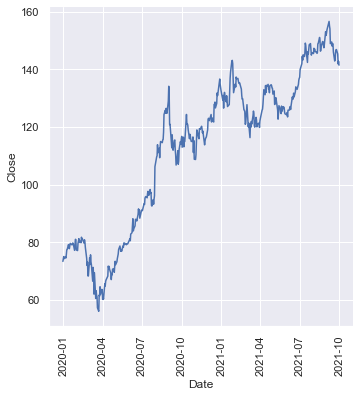

In [22]:
plt.figure(figsize = (15,8))
ax=sns.relplot(
    data=stocks[stocks.Stock == "AAPL"], 
    x="Date", y="Close", 
    kind="line"
)
plt.xticks(rotation=90)

In [7]:
sns.relplot?

## 调整宽度

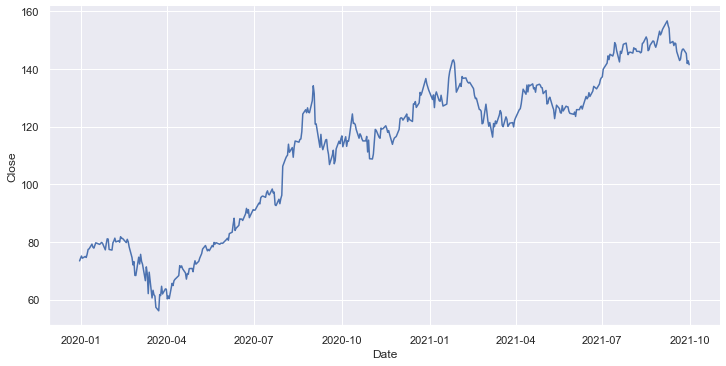

In [23]:
sns.relplot(
    data=stocks[stocks.Stock == "AAPL"], 
    x="Date", y="Close",
    kind="line",
    height=5, aspect=2 )

## 按不同股票分类

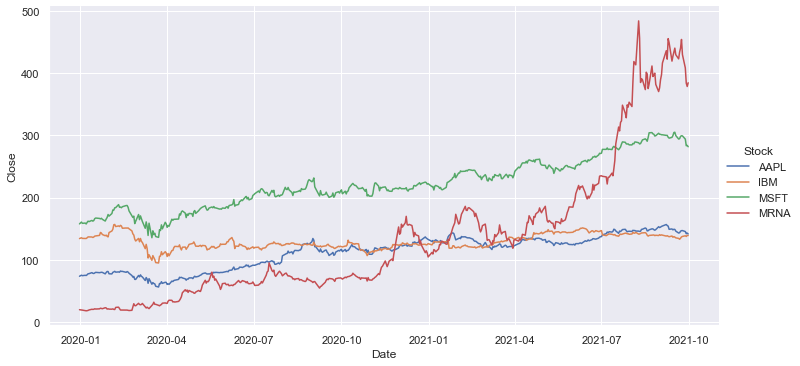

In [24]:
sns.relplot(
    data=stocks, 
    x="Date", y="Close", hue="Stock", 
    height=5, aspect=2, 
    kind="line"
)

## 增加标题

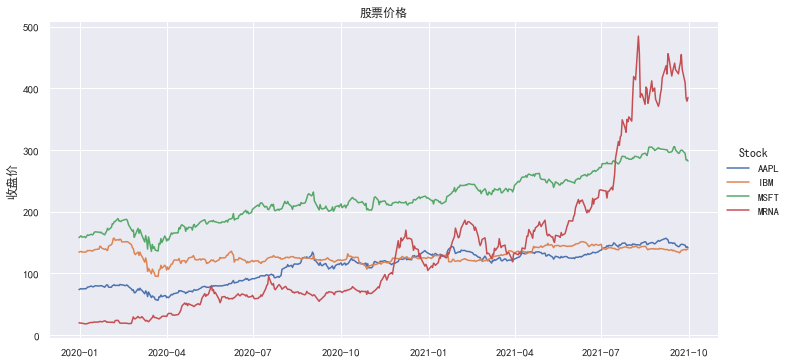

In [28]:
sns.relplot(
    data=stocks, 
    x="Date", y="Close", hue="Stock", 
    height=5, aspect=2, 
    kind="line"
).set(title='股票价格',ylabel='收盘价',xlabel=None)

## 按照不同行的方式展示股票

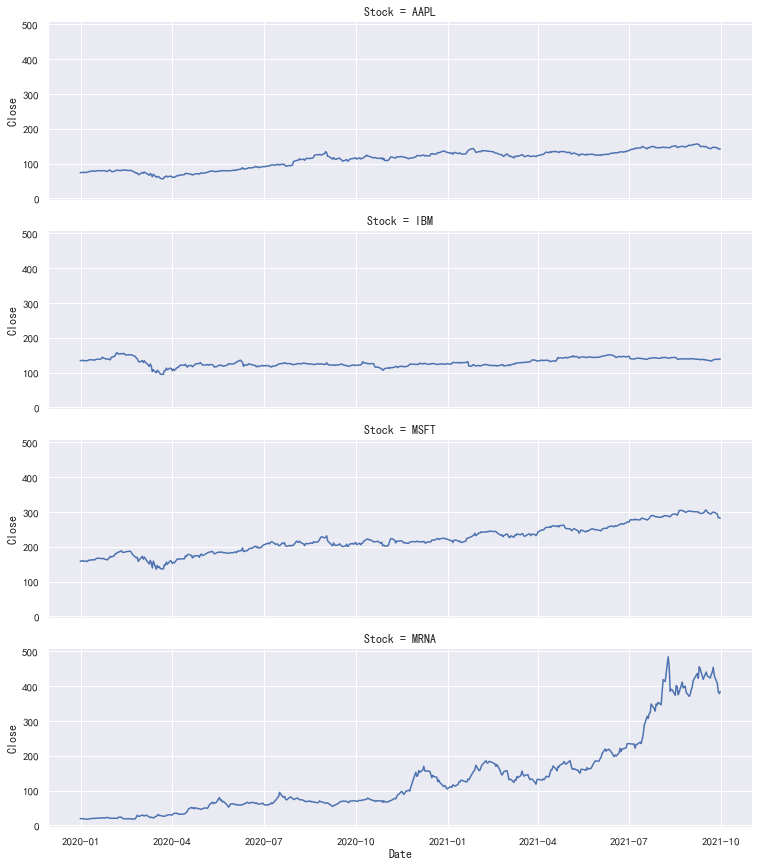

In [29]:
sns.relplot(
    data=stocks, x="Date", y="Close", 
    row="Stock",
    height=3, aspect=3.5,
    kind="line"
)